In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

#### Fitting a basic model from generated data

In [4]:
from sklearn.datasets.samples_generator import make_blobs

In [5]:
X, Y = make_blobs( n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6 )

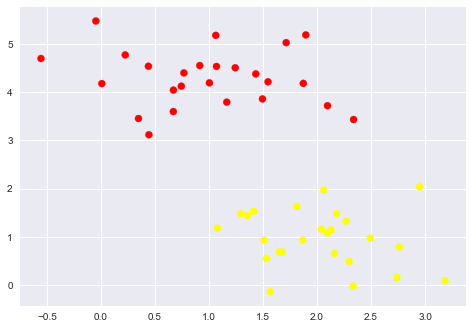

In [10]:
plt.scatter( X[:,0], X[:,1], c = Y, s =50, cmap = 'autumn')

In [11]:
from sklearn.svm import SVC # support vector cassifier

In [12]:
model = SVC( kernel = 'linear', C = 1e10 )
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Create a visualization function to see what the classifier does

In [74]:
def plot_svc_decision_function( model, ax = None, plot_support = True ):
    
    """ Plot the decision function for two-dimensional SVC """
    
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid to evaluate the model
    x = np.linspace( xlim[0], xlim[1], 30 )
    y = np.linspace( ylim[0], ylim[1], 30 )
    Y, X = np.meshgrid( y, x )
    xy = np.vstack( [ X.ravel(), Y.ravel() ] ).T
    P = model.decision_function(xy).reshape( X.shape )
    
    # plot decision boundary and margins
    ax.contour( X, Y, P, colors = 'black', levels = [-1,0,1], alpha = 0.5,
                linestyles = ['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter( model.support_vectors_[:,0],
                    model.support_vectors_[:,1],
                    s = 300, linewidth = 1, edgecolor = 'black', facecolor = 'none' )
            
    
    ax.set_xlim( xlim )
    ax.set_ylim( ylim )
    

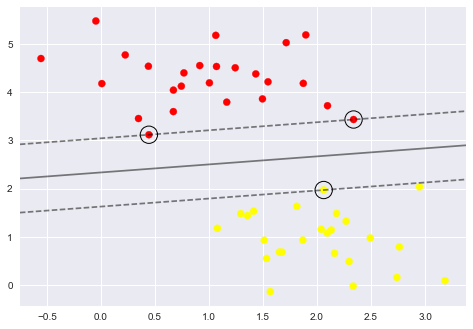

In [75]:
plt.scatter( X[:,0], X[:,1], c = Y, s =50, cmap = 'autumn' )
plot_svc_decision_function(model, plot_support=True);

The SVC model is insentive to the exact behaviour of distant points

### Non linear separable datasets and Kerne SVM

In [77]:
from sklearn.datasets.samples_generator import make_circles

In [78]:
X, Y = make_circles( 100, factor = 0.1, noise = 0.1 )

In [79]:
clf = SVC( kernel = 'linear' ).fit(X,Y)

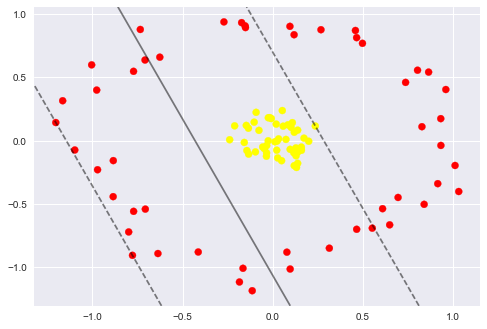

In [80]:
plt.scatter( X[:,0], X[:,1], c = Y, s =50, cmap = 'autumn' )
plot_svc_decision_function(clf, plot_support = False);

#### Radial basis function Kernel

In [81]:
clf = SVC( kernel = 'rbf', C = 1e6 )
clf.fit( X, Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

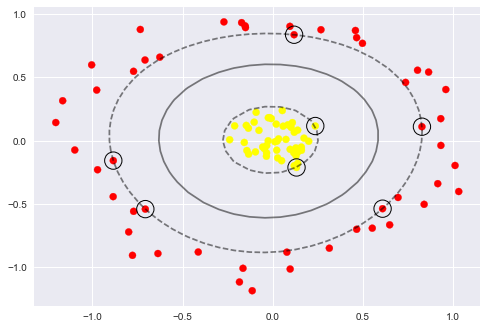

In [82]:
plt.scatter( X[:,0], X[:,1], c = Y, s =50, cmap = 'autumn' )
plot_svc_decision_function(clf, plot_support = True);

Softening the margins of the SVC means reducing the **C** parameter

### Facial Recognition example

In [97]:
from sklearn.datasets import fetch_lfw_people

In [103]:
faces = fetch_lfw_people( min_faces_per_person = 80 )

ImportError: The Python Imaging Library (PIL) is required to load data from jpeg files

In [ ]:
print( faces.target.names )
print( faces.images.shape )

In [101]:
fetch_lfw_people?